# Linear Regression Practical

######   House price prediction using Linear Reg Model

In [3]:
#taking dataset from sklearn only not from kaggle exclusively

In [4]:
from sklearn.datasets import fetch_california_housing  #to get dataset 
from sklearn.linear_model import LinearRegression  #to import our model/algorithm
from sklearn.metrics import mean_squared_error   #for evaluation of model(performance metric)
from sklearn.metrics import r2_score             #for evaluation of model(performance metric)
from sklearn.model_selection import train_test_split   #80% train data & 20% test data for model selection

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
#storing data of california housing in a housing variable
housing = fetch_california_housing()
type(housing)

sklearn.utils._bunch.Bunch

In [6]:
housing #so from this dataset we need data values,features values ,target values 

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [7]:
#lets convert this Bunch housing into Dataframe for proper analysis

df = pd.DataFrame(data=housing.data, columns=housing.feature_names)

In [8]:
df.head(5)  #all are independent features

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
df['MedHouseValue'] = housing.target  #merging dependent variable(feature) with dataset

In [10]:
df.head(5)  #last column is of Target varibale  .target variable is the median house value for California districts,\n expressed in $1 million 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
#Dividing the dataset into independent and dependent  variables 
X =df.drop('MedHouseValue' ,axis=1) #independent features       #or X=df.iloc[:,:-1]
y =df['MedHouseValue']  #dependent variable/target variable      #or y=df.iloc[:,-1]

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [13]:
X.isnull().sum()  #no null values here

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [14]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
type(X_train)
X_train.head(5)   #trainig data for our model(all indep. features)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80


In [16]:
y_train.head(5)   #trainig target feature of our dataset 

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
Name: MedHouseValue, dtype: float64

In [17]:
# Initialize the Linear Regression model where model_linear is varibale of our model
model_linear = LinearRegression()

In [18]:
# Train the model on the training data
model_linear.fit(X_train,y_train)

# Make predictions on the test data
y_pred = model_linear.predict(X_test)


In [19]:
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

In [20]:
# Evaluate the model using Mean Squared Error (MSE) and R-squared (R²) score

mse = mean_squared_error(y_test, y_pred) # y_test is actual data values and y_pred are the predicted values for X_test
r2 = r2_score(y_test, y_pred)

In [21]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared: {r2:.2f}")

Mean Squared Error: 0.56
R-Squared: 0.58


## R-squared (R²)

In [23]:
'''
What is R²?

R-squared (R²) tells you how well your model's predictions match the actual data.
It shows how much of the changes (or variability) in the thing you're trying to predict (the target or dependent variable) can be explained by the features (or independent variables) you're using.

Example:
Imagine you're trying to predict house prices using features like the number of bedrooms, size of the house, and location. R² tells you how well these features explain the differences in house prices.

If R² = 0.8 (or 80%), it means 80% of the changes in house prices can be explained by your model using those features.
The other 20% might be due to other factors that your model isn't considering, like economic trends or local events.
Key Points:
R² = 1 means your model explains all the changes perfectly.
R² = 0 means your model doesn’t explain anything.
Higher R² means your model is doing a good job at predicting the target.

'''

"\nWhat is R²?\n\nR-squared (R²) tells you how well your model's predictions match the actual data.\nIt shows how much of the changes (or variability) in the thing you're trying to predict (the target or dependent variable) can be explained by the features (or independent variables) you're using.\n\nExample:\nImagine you're trying to predict house prices using features like the number of bedrooms, size of the house, and location. R² tells you how well these features explain the differences in house prices.\n\nIf R² = 0.8 (or 80%), it means 80% of the changes in house prices can be explained by your model using those features.\nThe other 20% might be due to other factors that your model isn't considering, like economic trends or local events.\nKey Points:\nR² = 1 means your model explains all the changes perfectly.\nR² = 0 means your model doesn’t explain anything.\nHigher R² means your model is doing a good job at predicting the target.\n\n"

## Mean Squared Error

In [25]:
'''
The Mean Squared Error (MSE) is a common metric used to evaluate regression models. It measures the average of the squares of the errors, which are the differences between the actual and predicted values.
Lower MSE indicates better model performance, as it means the model's predictions are closer to the actual values.
'''

"\nThe Mean Squared Error (MSE) is a common metric used to evaluate regression models. It measures the average of the squares of the errors, which are the differences between the actual and predicted values.\nLower MSE indicates better model performance, as it means the model's predictions are closer to the actual values.\n"

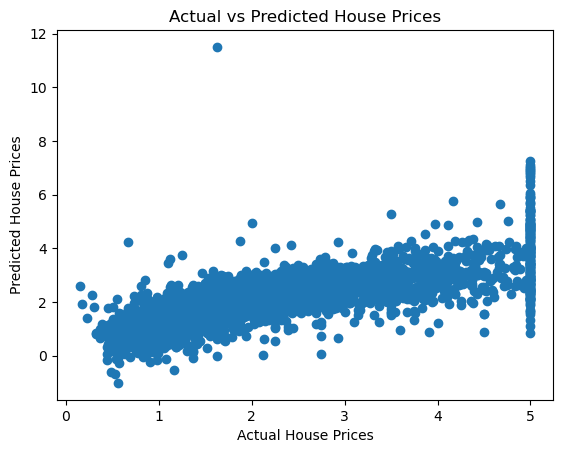

In [26]:
# Plot the predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()


In [27]:
# Print model coefficients for feature interpretation
print("Model Coefficients (Weights):")
for feature, coef in zip(X.columns, model_linear.coef_):
    print(f"{feature}: {coef:.2f}")

Model Coefficients (Weights):
MedInc: 0.45
HouseAge: 0.01
AveRooms: -0.12
AveBedrms: 0.78
Population: -0.00
AveOccup: -0.00
Latitude: -0.42
Longitude: -0.43
